<a href="https://colab.research.google.com/github/sesmael/ECGR-4105/blob/main/Homework(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

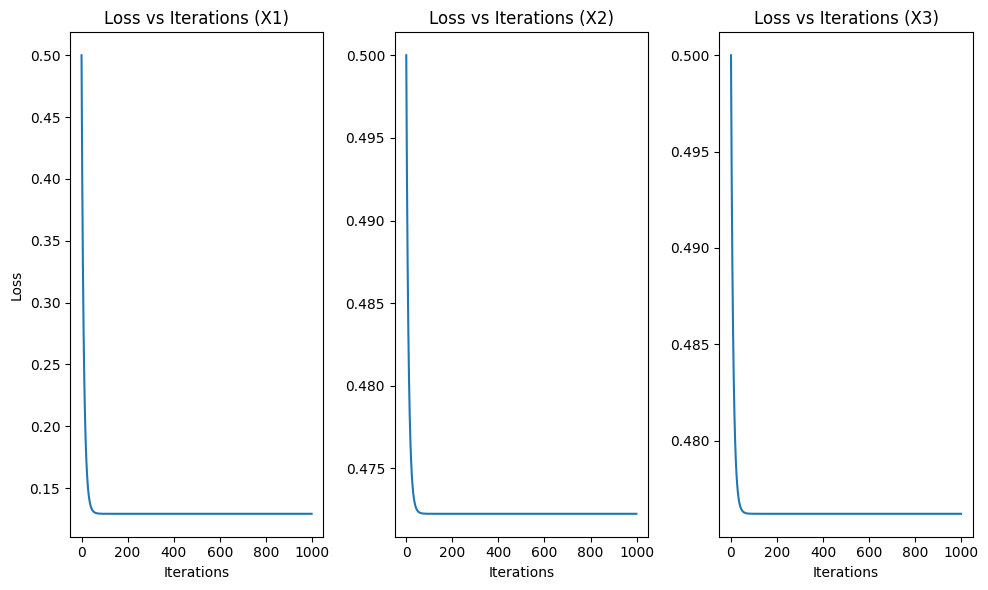

Linear model for X1: Y = -0.8611*X1 + -0.0000
Linear model for X2: Y = 0.2356*X2 + -0.0000
Linear model for X3: Y = -0.2182*X3 + -0.0000
Final Loss for X1: 0.12923610856237397
Final Loss for X2: 0.47225515155890835
Final Loss for X3: 0.47620247073392785
X1 is the best variable for predicting Y.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D3.csv")

# Separate explanatory variables and dependent variable
x1 = data['X1'].values
x2 = data['X2'].values
x3 = data['X3'].values
y = data['Y'].values

# Standardize the data (optional but often helps with gradient descent)
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)
x3 = (x3 - np.mean(x3)) / np.std(x3)
y = (y - np.mean(y)) / np.std(y)

# Gradient descent function for linear regression
def gradient_descent(x, y, learning_rate, num_iterations):
    m = len(y)
    theta = 0
    bias = 0
    cost_history = []

    for i in range(num_iterations):
        y_pred = theta * x + bias
        error = y_pred - y

        # Compute gradients
        d_theta = (1/m) * np.dot(x.T, error)
        d_bias = (1/m) * np.sum(error)

        # Update parameters
        theta -= learning_rate * d_theta
        bias -= learning_rate * d_bias

        # Compute cost (mean squared error)
        cost = (1/(2*m)) * np.sum(np.square(error))
        cost_history.append(cost)

    return theta, bias, cost_history

# Run gradient descent for each explanatory variable
learning_rate = 0.05
num_iterations = 1000

theta_x1, bias_x1, cost_history_x1 = gradient_descent(x1, y, learning_rate, num_iterations)
theta_x2, bias_x2, cost_history_x2 = gradient_descent(x2, y, learning_rate, num_iterations)
theta_x3, bias_x3, cost_history_x3 = gradient_descent(x3, y, learning_rate, num_iterations)

# Plot the cost history for each variable
plt.figure(figsize=(10,6))

# Plot for x1
plt.subplot(1, 3, 1)
plt.plot(cost_history_x1)
plt.title("Loss vs Iterations (X1)")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Plot for x2
plt.subplot(1, 3, 2)
plt.plot(cost_history_x2)
plt.title("Loss vs Iterations (X2)")
plt.xlabel("Iterations")

# Plot for x3
plt.subplot(1, 3, 3)
plt.plot(cost_history_x3)
plt.title("Loss vs Iterations (X3)")
plt.xlabel("Iterations")

plt.tight_layout()
plt.show()

# Report the linear models found
print(f"Linear model for X1: Y = {theta_x1:.4f}*X1 + {bias_x1:.4f}")
print(f"Linear model for X2: Y = {theta_x2:.4f}*X2 + {bias_x2:.4f}")
print(f"Linear model for X3: Y = {theta_x3:.4f}*X3 + {bias_x3:.4f}")

# Determine which variable has the lowest loss
final_loss_x1 = cost_history_x1[-1]
final_loss_x2 = cost_history_x2[-1]
final_loss_x3 = cost_history_x3[-1]

print(f"Final Loss for X1: {final_loss_x1}")
print(f"Final Loss for X2: {final_loss_x2}")
print(f"Final Loss for X3: {final_loss_x3}")

if final_loss_x1 < final_loss_x2 and final_loss_x1 < final_loss_x3:
    print("X1 is the best variable for predicting Y.")
elif final_loss_x2 < final_loss_x1 and final_loss_x2 < final_loss_x3:
    print("X2 is the best variable for predicting Y.")
else:
    print("X3 is the best variable for predicting Y.")


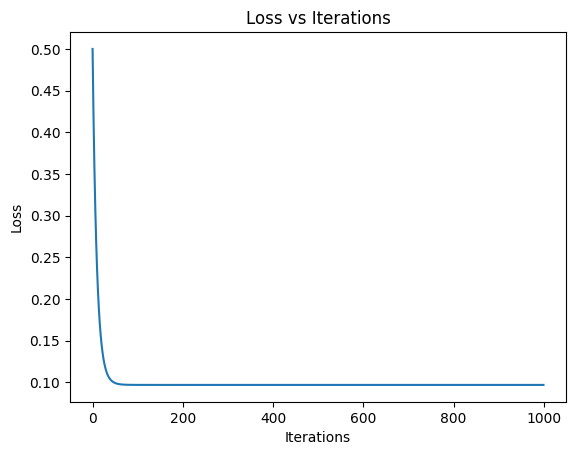

Final Linear Model: Y = -0.8465*X1 + 0.2250*X2 + -0.1113*X3 + -0.0000
Prediction for (1, 1, 1): 0.6252
Prediction for (2, 0, 4): -0.5821
Prediction for (3, 2, 1): -0.6334


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D3.csv")

# Separate explanatory variables and dependent variable
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values

# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

# Gradient descent function for multi-variable linear regression
def gradient_descent_multi(X, y, learning_rate, num_iterations):
    m, n = X.shape  # m = number of samples, n = number of features (X1, X2, X3)
    theta = np.zeros(n)  # Initialize theta to zero
    bias = 0  # Initialize bias to zero
    cost_history = []

    for i in range(num_iterations):
        y_pred = np.dot(X, theta) + bias
        error = y_pred - y

        # Compute gradients
        d_theta = (1/m) * np.dot(X.T, error)
        d_bias = (1/m) * np.sum(error)

        # Update parameters
        theta -= learning_rate * d_theta
        bias -= learning_rate * d_bias

        # Compute cost (mean squared error)
        cost = (1/(2*m)) * np.sum(np.square(error))
        cost_history.append(cost)

    return theta, bias, cost_history

# Run gradient descent for all explanatory variables (X1, X2, X3)
learning_rate = 0.05  # You can adjust this to test different learning rates
num_iterations = 1000

theta, bias, cost_history = gradient_descent_multi(X, y, learning_rate, num_iterations)

# Plot the cost history (loss over iterations)
plt.plot(cost_history)
plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# Report the final linear model
linear_model = f"Y = {theta[0]:.4f}*X1 + {theta[1]:.4f}*X2 + {theta[2]:.4f}*X3 + {bias:.4f}"
print(f"Final Linear Model: {linear_model}")

# Predict the value of y for new (X1, X2, X3) values
def predict(X_new, theta, bias):
    return np.dot(X_new, theta) + bias

# New values for predictions
X_new_1 = [1, 1, 1]
X_new_2 = [2, 0, 4]
X_new_3 = [3, 2, 1]

# Standardize the new input values
X_new_1_std = (X_new_1 - np.mean(data[['X1', 'X2', 'X3']], axis=0)) / np.std(data[['X1', 'X2', 'X3']], axis=0)
X_new_2_std = (X_new_2 - np.mean(data[['X1', 'X2', 'X3']], axis=0)) / np.std(data[['X1', 'X2', 'X3']], axis=0)
X_new_3_std = (X_new_3 - np.mean(data[['X1', 'X2', 'X3']], axis=0)) / np.std(data[['X1', 'X2', 'X3']], axis=0)

# Make predictions
y_pred_1 = predict(X_new_1_std, theta, bias)
y_pred_2 = predict(X_new_2_std, theta, bias)
y_pred_3 = predict(X_new_3_std, theta, bias)

# Display predictions
print(f"Prediction for (1, 1, 1): {y_pred_1:.4f}")
print(f"Prediction for (2, 0, 4): {y_pred_2:.4f}")
print(f"Prediction for (3, 2, 1): {y_pred_3:.4f}")
